In [1]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [5]:
# leer csv
data = pd.read_csv("data/data_nasa_wrf_merge_3.csv")

In [6]:
data.head()

,Unnamed: 0,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour_x,...,0pre,10-15pre,5-10pre,15-20pre,25-30pre,20-25pre,1-5pre,>30pre,0,estacion_y
0,0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,0,...,1,0,0,0,0,0,0,0,0,WINTER
1,1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,30,...,1,0,0,0,0,0,0,0,0,WINTER
2,2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,60,...,1,0,0,0,0,0,0,0,0,WINTER
3,3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,90,...,1,0,0,0,0,0,0,0,0,WINTER
4,4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,120,...,1,0,0,0,0,0,0,0,0,WINTER


In [7]:
data.columns

Index(['Unnamed: 0', 'Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year',
       'Month', 'Day', 'Hour_x', 'RainIMR', 'areaInfluencia2', 'estacion_x',
       'Hora', 'Hour_y', 'RainWRF', 'Fecha', '0pre', '10-15pre', '5-10pre',
       '15-20pre', '25-30pre', '20-25pre', '1-5pre', '>30pre', '0',
       'estacion_y'],
      dtype='object')

In [8]:
data = data[['Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year', 'Month', 'Day', 'Hora', 'RainIMR', 'RainWRF', 'Fecha','estacion_y']]

In [9]:
data.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hora,RainIMR,RainWRF,Fecha,estacion_y
0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,00:00,0.0,0.0,2014-03-12 00:00:00,WINTER
1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,00:30,0.0,0.0,2014-03-12 00:30:00,WINTER
2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,01:00,0.0,0.0,2014-03-12 01:00:00,WINTER
3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,01:30,0.0,0.0,2014-03-12 01:30:00,WINTER
4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,02:00,0.0,0.0,2014-03-12 02:00:00,WINTER


In [30]:
def convertirReflectividad(v):
    valueForLog = 200*v**(1.6)
    if valueForLog <= 0:
        return 0
    else:
        return 10 * math.log10(valueForLog)

In [31]:
data["Reflectividad"] = data.apply(lambda x: convertirReflectividad(x["RainWRF"]), axis=1)

In [32]:
data.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hora,RainIMR,RainWRF,Fecha,estacion_y,Reflectividad
0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,00:00,0.0,0.0,2014-03-12 00:00:00,WINTER,0.0
1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,00:30,0.0,0.0,2014-03-12 00:30:00,WINTER,0.0
2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,01:00,0.0,0.0,2014-03-12 01:00:00,WINTER,0.0
3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,01:30,0.0,0.0,2014-03-12 01:30:00,WINTER,0.0
4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,02:00,0.0,0.0,2014-03-12 02:00:00,WINTER,0.0


In [33]:
data.describe()

,Canon,Long,Lat,Year,Month,Day,RainIMR,RainWRF,Reflectividad
count,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06
mean,2.533333e+01,-1.020706e+02,2.039851e+01,2.015517e+03,6.567365e+00,1.577320e+01,8.755094e-02,7.191747e-02,1.522295e+00
std,1.476106e+01,1.203219e+00,1.311430e+00,1.074892e+00,3.272543e+00,8.815318e+00,8.294015e-01,5.615238e-01,5.363855e+00
min,1.000000e+00,-1.037294e+02,1.919281e+01,2.014000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-8.277489e+00
25%,1.275000e+01,-1.034435e+02,1.946838e+01,2.015000e+03,4.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.550000e+01,-1.020313e+02,1.979474e+01,2.016000e+03,7.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.600000e+01,-1.012254e+02,2.077171e+01,2.016000e+03,9.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,5.100000e+01,-1.000542e+02,2.391412e+01,2.017000e+03,1.200000e+01,3.100000e+01,5.000000e+01,1.763405e+02,5.895193e+01


In [34]:
data.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hora,RainIMR,RainWRF,Fecha,estacion_y,Reflectividad
0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,00:00,0.0,0.0,2014-03-12 00:00:00,WINTER,0.0
1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,00:30,0.0,0.0,2014-03-12 00:30:00,WINTER,0.0
2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,01:00,0.0,0.0,2014-03-12 01:00:00,WINTER,0.0
3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,01:30,0.0,0.0,2014-03-12 01:30:00,WINTER,0.0
4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,02:00,0.0,0.0,2014-03-12 02:00:00,WINTER,0.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308608 entries, 0 to 2308607
Data columns (total 14 columns):
Canon            int64
Estado           object
Nombre           object
Long             float64
Lat              float64
Year             int64
Month            int64
Day              int64
Hora             object
RainIMR          float64
RainWRF          float64
Fecha            object
estacion_y       object
Reflectividad    float64
dtypes: float64(5), int64(4), object(5)
memory usage: 246.6+ MB


In [36]:
data["diff"] = abs(data["RainIMR"] - data["RainWRF"])

In [37]:
data.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hora,RainIMR,RainWRF,Fecha,estacion_y,Reflectividad,diff
0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,00:00,0.0,0.0,2014-03-12 00:00:00,WINTER,0.0,0.0
1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,00:30,0.0,0.0,2014-03-12 00:30:00,WINTER,0.0,0.0
2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,01:00,0.0,0.0,2014-03-12 01:00:00,WINTER,0.0,0.0
3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,01:30,0.0,0.0,2014-03-12 01:30:00,WINTER,0.0,0.0
4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,02:00,0.0,0.0,2014-03-12 02:00:00,WINTER,0.0,0.0


In [38]:
data.describe()

,Canon,Long,Lat,Year,Month,Day,RainIMR,RainWRF,Reflectividad,diff
count,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06,2.308608e+06
mean,2.533333e+01,-1.020706e+02,2.039851e+01,2.015517e+03,6.567365e+00,1.577320e+01,8.755094e-02,7.191747e-02,1.522295e+00,1.463517e-01
std,1.476106e+01,1.203219e+00,1.311430e+00,1.074892e+00,3.272543e+00,8.815318e+00,8.294015e-01,5.615238e-01,5.363855e+00,9.700324e-01
min,1.000000e+00,-1.037294e+02,1.919281e+01,2.014000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-8.277489e+00,0.000000e+00
25%,1.275000e+01,-1.034435e+02,1.946838e+01,2.015000e+03,4.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.550000e+01,-1.020313e+02,1.979474e+01,2.016000e+03,7.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.600000e+01,-1.012254e+02,2.077171e+01,2.016000e+03,9.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.100000e+01,-1.000542e+02,2.391412e+01,2.017000e+03,1.200000e+01,3.100000e+01,5.000000e+01,1.763405e+02,5.895193e+01,1.763405e+02


In [39]:
data.to_csv("data/data_wrf_nasa_post_processing.csv")

In [42]:
data.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hora,RainIMR,RainWRF,Fecha,estacion_y,Reflectividad,diff
0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,00:00,0.0,0.0,2014-03-12 00:00:00,WINTER,0.0,0.0
1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,00:30,0.0,0.0,2014-03-12 00:30:00,WINTER,0.0,0.0
2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,01:00,0.0,0.0,2014-03-12 01:00:00,WINTER,0.0,0.0
3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,01:30,0.0,0.0,2014-03-12 01:30:00,WINTER,0.0,0.0
4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,02:00,0.0,0.0,2014-03-12 02:00:00,WINTER,0.0,0.0


In [43]:
data[['RainIMR', 'RainWRF', 'Fecha', 'estacion_y', 'Reflectividad','diff']].to_csv("data/data_correlacion.csv")

In [74]:
dataCorr = pd.read_csv("data/data_correlacion.csv")

In [75]:
dataCorr = dataCorr.loc[dataCorr["RainIMR"] > 0]

In [76]:
dataCorr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185850 entries, 506 to 2308425
Data columns (total 7 columns):
Unnamed: 0       185850 non-null int64
RainIMR          185850 non-null float64
RainWRF          185850 non-null float64
Fecha            185850 non-null object
estacion_y       185850 non-null object
Reflectividad    185850 non-null float64
diff             185850 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 11.3+ MB


In [77]:
dataCorr.to_csv("data/data_corr_sin_0.csv")

In [49]:
dataCorr.corr()

,Unnamed: 0,RainIMR,RainWRF,Reflectividad,diff
Unnamed: 0,1.000000,-0.023080,-0.005696,0.013342,-0.019010
RainIMR,-0.023080,1.000000,0.044102,0.065243,0.831467
RainWRF,-0.005696,0.044102,1.000000,0.591038,0.562261
Reflectividad,0.013342,0.065243,0.591038,1.000000,0.340537
diff,-0.019010,0.831467,0.562261,0.340537,1.000000


In [55]:
dataCorr["estacion_y"].unique()

array(['WINTER', 'SPRING', 'SUMMER', 'AUTUMN'], dtype=object)

In [57]:
for i in dataCorr["estacion_y"].unique():
    dataCorr[i] = [1 if x == i else 0 for x in dataCorr["estacion_y"]]

In [58]:
dataCorr.head()

,Unnamed: 0,RainIMR,RainWRF,Fecha,estacion_y,Reflectividad,diff,WINTER,SPRING,SUMMER,AUTUMN
0,0,0.0,0.0,2014-03-12 00:00:00,WINTER,0.0,0.0,1,0,0,0
1,1,0.0,0.0,2014-03-12 00:30:00,WINTER,0.0,0.0,1,0,0,0
2,2,0.0,0.0,2014-03-12 01:00:00,WINTER,0.0,0.0,1,0,0,0
3,3,0.0,0.0,2014-03-12 01:30:00,WINTER,0.0,0.0,1,0,0,0
4,4,0.0,0.0,2014-03-12 02:00:00,WINTER,0.0,0.0,1,0,0,0


In [59]:
dataCorr.columns

Index(['Unnamed: 0', 'RainIMR', 'RainWRF', 'Fecha', 'estacion_y',
       'Reflectividad', 'diff', 'WINTER', 'SPRING', 'SUMMER', 'AUTUMN'],
      dtype='object')

In [71]:
dataCorr = dataCorr[['RainIMR', 'RainWRF', 'Fecha', 'estacion_y',
       'Reflectividad', 'diff', 'WINTER', 'SPRING', 'SUMMER', 'AUTUMN']]

KeyError: "['WINTER' 'SPRING' 'SUMMER' 'AUTUMN'] not in index"

In [63]:
dataCorr.columns

Index(['RainIMR', 'RainWRF', 'Fecha', 'estacion_y', 'Reflectividad', 'diff',
       'WINTER', 'SPRING', 'SUMMER', 'AUTUMN'],
      dtype='object')

In [9]:
import seaborn as sns

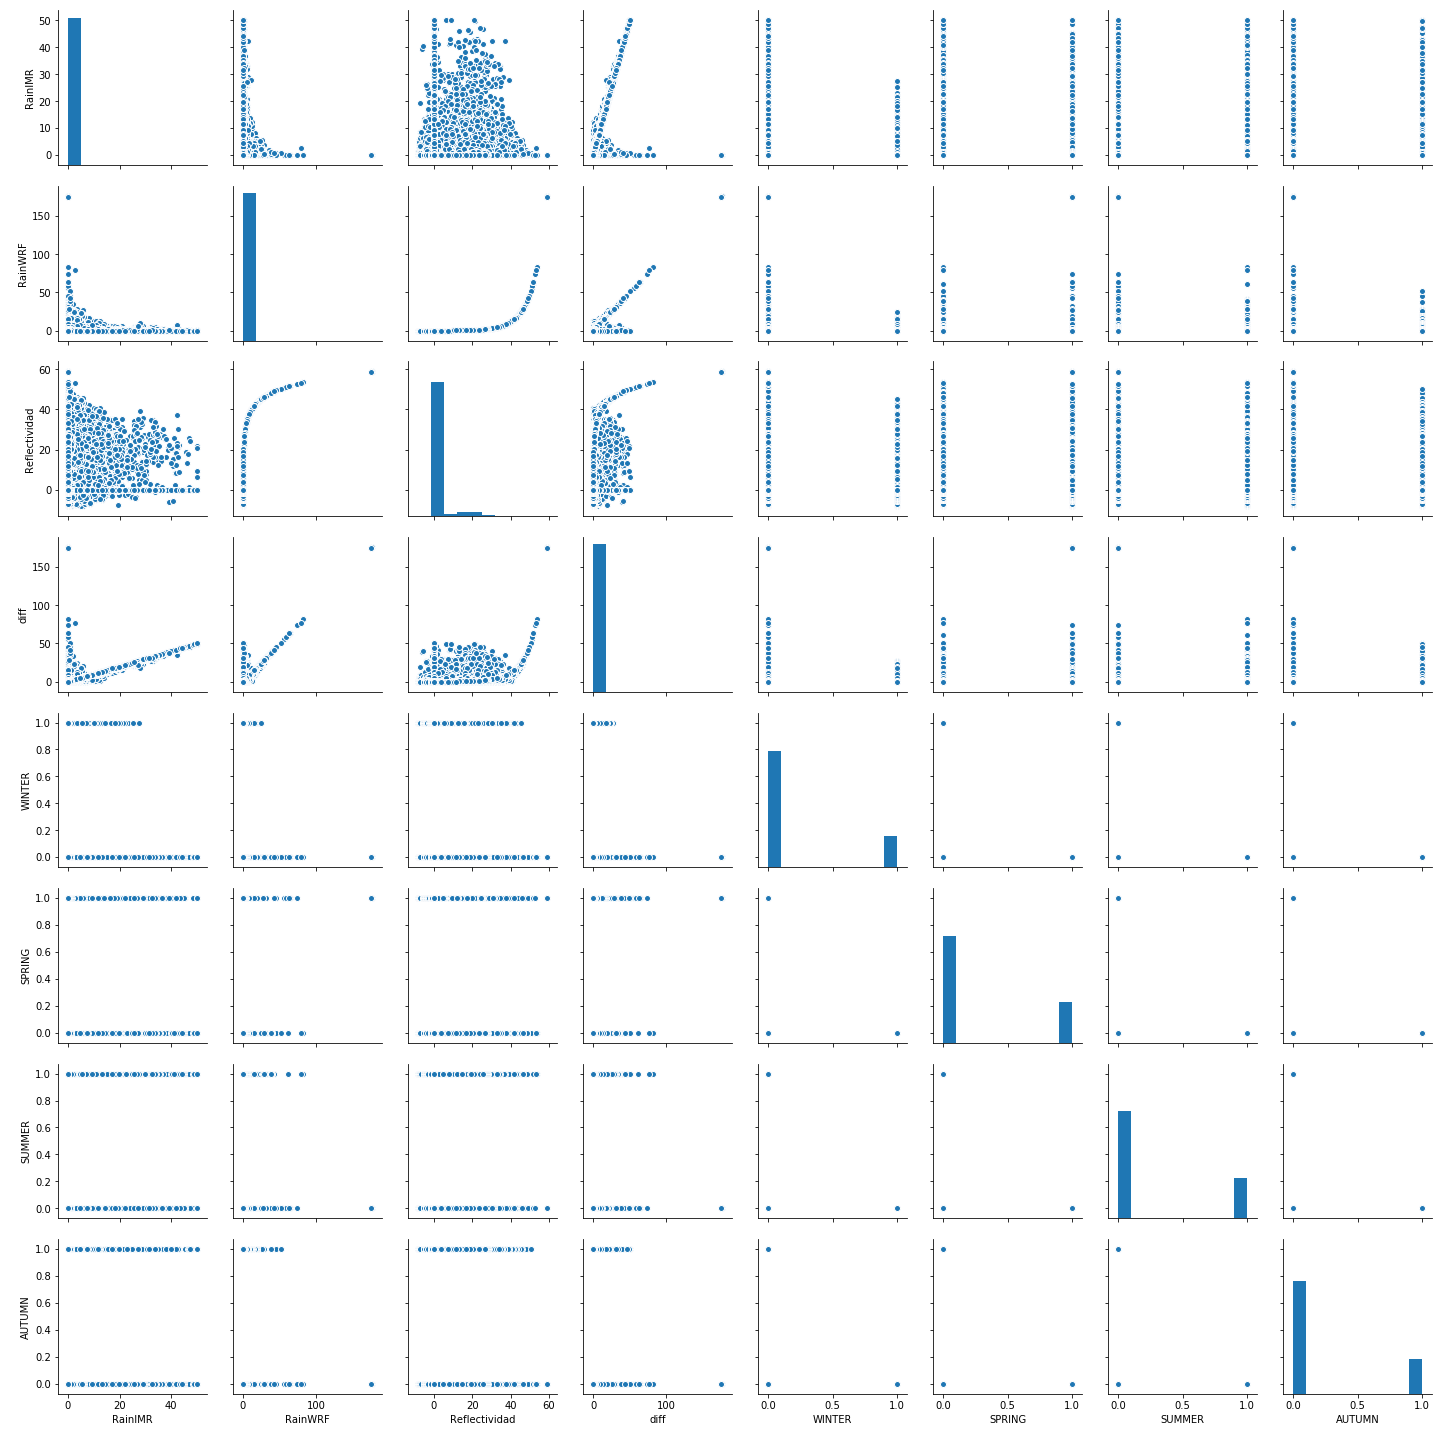

In [65]:
sns.pairplot(dataCorr)

In [67]:
dataCorr.columns

Index(['RainIMR', 'RainWRF', 'Fecha', 'estacion_y', 'Reflectividad', 'diff',
       'WINTER', 'SPRING', 'SUMMER', 'AUTUMN'],
      dtype='object')

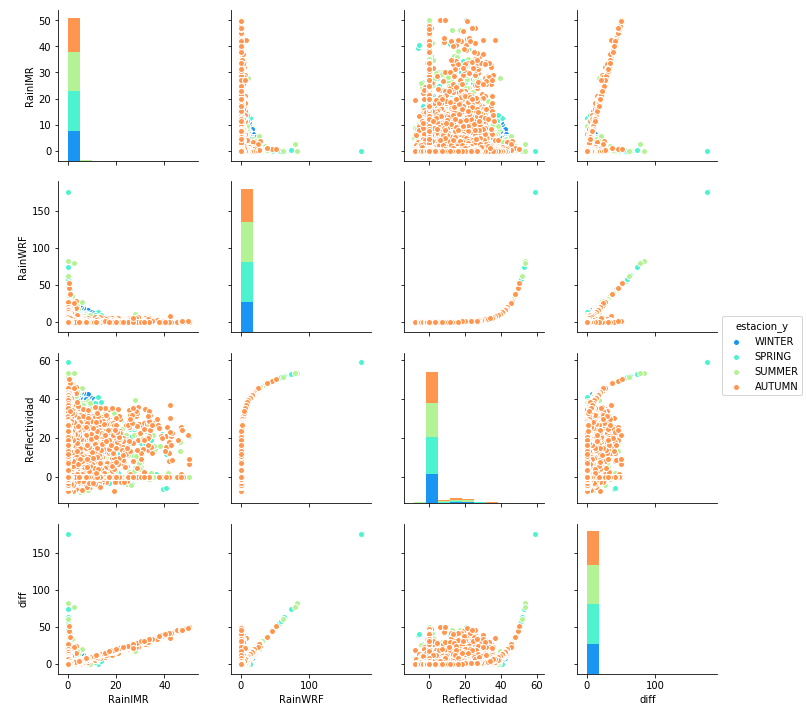

In [68]:
sns.pairplot(dataCorr[['RainIMR', 'RainWRF', 'Fecha', 'estacion_y', 'Reflectividad', 'diff']], hue='estacion_y',palette="rainbow")

In [69]:
dataCorr = dataCorr.loc[data["RainIMR"] < 1]

In [70]:
dataCorr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2266975 entries, 0 to 2308607
Data columns (total 15 columns):
Canon            int64
Estado           object
Nombre           object
Long             float64
Lat              float64
Year             int64
Month            int64
Day              int64
Hora             object
RainIMR          float64
RainWRF          float64
Fecha            object
estacion_y       object
Reflectividad    float64
diff             float64
dtypes: float64(6), int64(4), object(5)
memory usage: 276.7+ MB


In [3]:
data = pd.read_csv("data/data_corr_sin_0.csv")

In [5]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'RainIMR', 'RainWRF', 'Fecha',
       'estacion_y', 'Reflectividad', 'diff'],
      dtype='object')

In [6]:
data = data[['RainIMR', 'RainWRF', 'estacion_y', 'Reflectividad', 'diff']]

In [7]:
data.corr()

,RainIMR,RainWRF,Reflectividad,diff
RainIMR,1.000000,0.030743,0.059087,0.944408
RainWRF,0.030743,1.000000,0.659405,0.294968
Reflectividad,0.059087,0.659405,1.000000,0.162399
diff,0.944408,0.294968,0.162399,1.000000


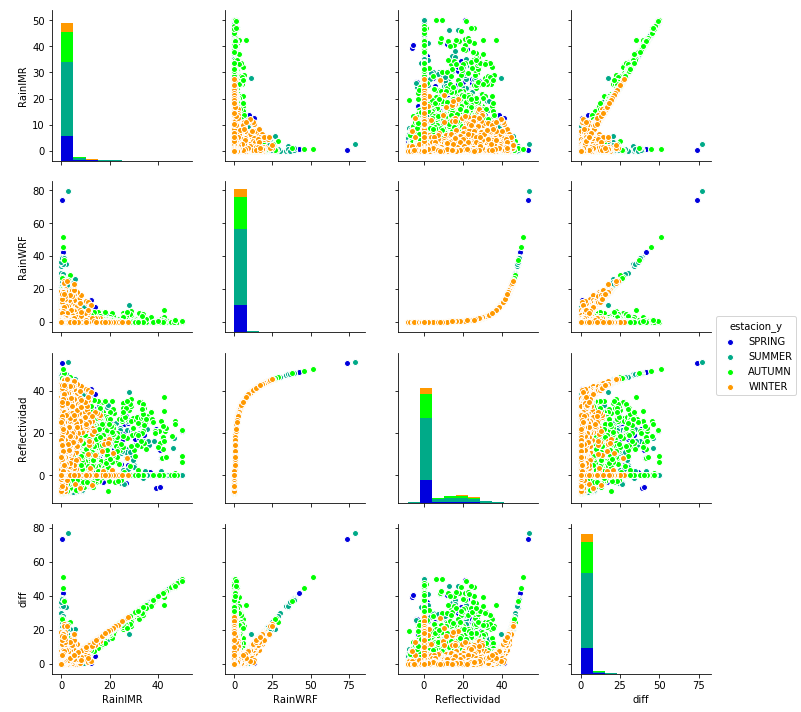

In [12]:
sns.pairplot(data, hue="estacion_y", palette="nipy_spectral")

In [14]:
data.groupby("estacion_y").count()

,RainIMR,RainWRF,Reflectividad,diff
estacion_y,,,,
AUTUMN,40803,40803,40803,40803
SPRING,34320,34320,34320,34320
SUMMER,99509,99509,99509,99509
WINTER,11218,11218,11218,11218


In [15]:
dataCorr = pd.read_csv("data/data_correlacion.csv")

In [16]:
dataCorr.head()

,Unnamed: 0,RainIMR,RainWRF,Fecha,estacion_y,Reflectividad,diff
0,0,0.0,0.0,2014-03-12 00:00:00,WINTER,0.0,0.0
1,1,0.0,0.0,2014-03-12 00:30:00,WINTER,0.0,0.0
2,2,0.0,0.0,2014-03-12 01:00:00,WINTER,0.0,0.0
3,3,0.0,0.0,2014-03-12 01:30:00,WINTER,0.0,0.0
4,4,0.0,0.0,2014-03-12 02:00:00,WINTER,0.0,0.0


In [17]:
# leer csv
data = pd.read_csv("data/data_nasa_wrf_merge_3.csv")

In [18]:
data.head()

,Unnamed: 0,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour_x,...,0pre,10-15pre,5-10pre,15-20pre,25-30pre,20-25pre,1-5pre,>30pre,0,estacion_y
0,0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,0,...,1,0,0,0,0,0,0,0,0,WINTER
1,1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,30,...,1,0,0,0,0,0,0,0,0,WINTER
2,2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,60,...,1,0,0,0,0,0,0,0,0,WINTER
3,3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,90,...,1,0,0,0,0,0,0,0,0,WINTER
4,4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,120,...,1,0,0,0,0,0,0,0,0,WINTER


In [21]:
data = data[['Canon', 'Estado', 'Nombre', 'Year', 'Month', 'Day', 'Hora', 'RainIMR', 'RainWRF','estacion_y']]

In [22]:
data.head()

,Canon,Estado,Nombre,Year,Month,Day,Hora,RainIMR,RainWRF,estacion_y
0,1,MICH,La Alberca,2014,3,12,00:00,0.0,0.0,WINTER
1,1,MICH,La Alberca,2014,3,12,00:30,0.0,0.0,WINTER
2,1,MICH,La Alberca,2014,3,12,01:00,0.0,0.0,WINTER
3,1,MICH,La Alberca,2014,3,12,01:30,0.0,0.0,WINTER
4,1,MICH,La Alberca,2014,3,12,02:00,0.0,0.0,WINTER


In [23]:
def convertirReflectividad(v):
    valueForLog = 200*v**(1.6)
    if valueForLog <= 0:
        return 0
    else:
        return 10 * math.log10(valueForLog)

In [24]:
data["Reflectividad"] = data.apply(lambda x: convertirReflectividad(x["RainWRF"]), axis=1)

In [39]:
data = pd.read_csv("data/data_wrf_nasa_post_processing.csv")

In [40]:
data.columns

Index(['Unnamed: 0', 'Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year',
       'Month', 'Day', 'Hora', 'RainIMR', 'RainWRF', 'Fecha', 'estacion_y',
       'Reflectividad', 'diff'],
      dtype='object')

In [41]:
data = data[['Canon', 'Estado', 'Nombre', 'Year',
       'Month', 'Day', 'Hora', 'RainIMR', 'RainWRF', 'estacion_y',
       'Reflectividad', 'diff']]

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308608 entries, 0 to 2308607
Data columns (total 12 columns):
Canon            int64
Estado           object
Nombre           object
Year             int64
Month            int64
Day              int64
Hora             object
RainIMR          float64
RainWRF          float64
estacion_y       object
Reflectividad    float64
diff             float64
dtypes: float64(4), int64(4), object(4)
memory usage: 211.4+ MB


In [44]:
data = data.loc[data["RainIMR"] > 0]

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185850 entries, 506 to 2308425
Data columns (total 12 columns):
Canon            185850 non-null int64
Estado           185850 non-null object
Nombre           185850 non-null object
Year             185850 non-null int64
Month            185850 non-null int64
Day              185850 non-null int64
Hora             185850 non-null object
RainIMR          185850 non-null float64
RainWRF          185850 non-null float64
estacion_y       185850 non-null object
Reflectividad    185850 non-null float64
diff             185850 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 18.4+ MB


In [46]:
import seaborn as sns

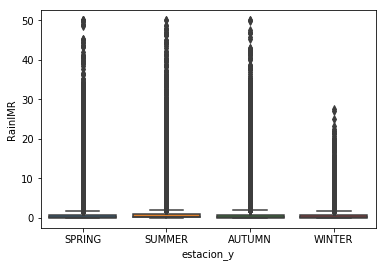

In [49]:
sns.boxplot(x="estacion_y", y="RainIMR",data=data)

KeyboardInterrupt: 

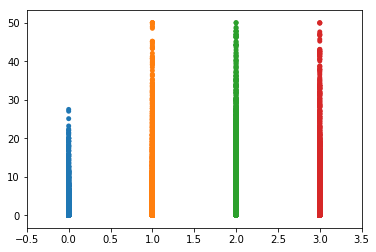

In [35]:
sns.swarmplot(x="estacion_y", y="RainIMR", data=data )

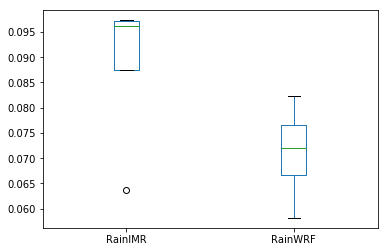

In [36]:
data.groupby(["Year"]).mean()[["RainIMR", "RainWRF"]].plot.box()

In [51]:
data.head()

,Canon,Estado,Nombre,Year,Month,Day,Hora,RainIMR,RainWRF,estacion_y,Reflectividad,diff
506,1,MICH,La Alberca,2014,3,22,13:00,0.099763,0.0,SPRING,0.0,0.099763
507,1,MICH,La Alberca,2014,3,22,13:30,0.099763,0.0,SPRING,0.0,0.099763
613,1,MICH,La Alberca,2014,3,24,18:30,0.033557,0.0,SPRING,0.0,0.033557
614,1,MICH,La Alberca,2014,3,24,19:00,0.033557,0.0,SPRING,0.0,0.033557
830,1,MICH,La Alberca,2014,3,29,07:00,0.033557,0.0,SPRING,0.0,0.033557


In [53]:
dataCorr = data[['Year','RainIMR','RainWRF', 'estacion_y', 'Reflectividad', 'diff']]

/home/jorge/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
/home/jorge/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/jorge/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/jorge/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/home/jorge/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jorge/anaconda3/li

KeyboardInterrupt: 

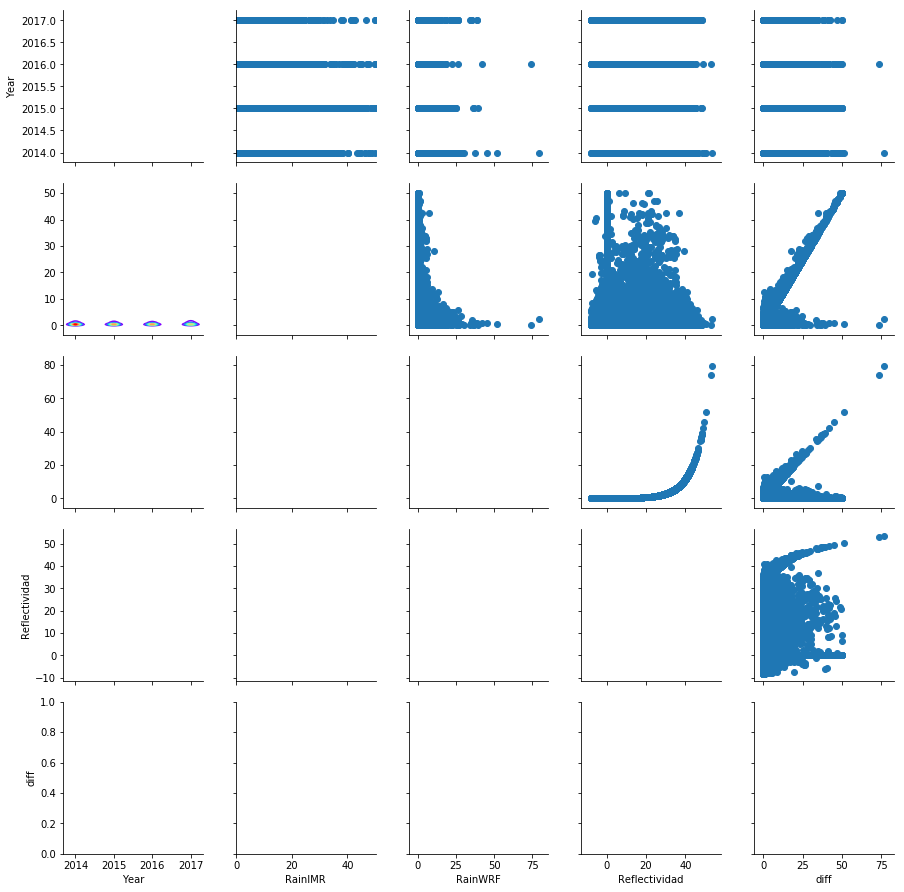

In [55]:
g = sns.PairGrid(dataCorr)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="rainbow")
g.map_dig(sns.kdeplot, lw=2, legend=False)

In [61]:
dataCorr.reset_index()

,index,Year,RainIMR,RainWRF,estacion_y,Reflectividad,diff
0,506,2014,0.099763,0.000000,SPRING,0.000000,0.099763
1,507,2014,0.099763,0.000000,SPRING,0.000000,0.099763
2,613,2014,0.033557,0.000000,SPRING,0.000000,0.033557
3,614,2014,0.033557,0.000000,SPRING,0.000000,0.033557
4,830,2014,0.033557,0.000000,SPRING,0.000000,0.033557
5,831,2014,0.033557,0.000000,SPRING,0.000000,0.033557
6,832,2014,0.033557,0.000000,SPRING,0.000000,0.033557
7,888,2014,0.099763,0.000000,SPRING,0.000000,0.099763
8,928,2014,0.033557,0.000000,SPRING,0.000000,0.033557
9,929,2014,0.033557,0.000000,SPRING,0.000000,0.033557


In [64]:
dataCorr.pivot_table(index="estacion_y", columns="Year")["RainIMR"]

Year,2014,2015,2016,2017
estacion_y,,,,
AUTUMN,0.846239,1.843981,0.900939,1.182729
SPRING,1.022431,1.376187,1.159546,1.377433
SUMMER,0.979931,1.132114,0.911843,1.088155
WINTER,0.532395,1.029476,1.140474,0.650000


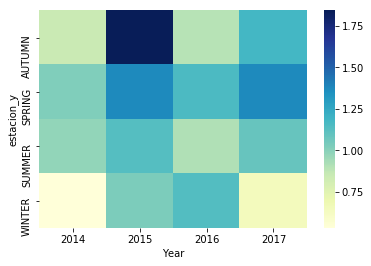

In [86]:
ax = sns.heatmap(dataCorr.pivot_table(index="estacion_y", columns="Year", aggfunc=np.mean)["RainIMR"], cmap="YlGnBu")

In [82]:
data.pivot_table(index="estacion_y", columns="Hora", aggfunc=np.mean)["RainIMR"]

Hora,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
estacion_y,,,,,,,,,,,,,,,,,,,,,
AUTUMN,0.977832,1.011511,1.010967,1.280306,1.324174,1.185935,1.314295,1.816403,2.414919,1.812642,...,0.846836,1.060542,1.324541,1.226751,1.100570,1.122406,0.919221,0.964949,0.854197,0.936544
SPRING,0.984265,0.896507,1.057618,1.079303,1.023066,1.255226,1.514665,2.619813,4.241585,3.931545,...,0.634936,0.794269,0.771462,0.670563,0.665671,0.795439,0.839986,0.884472,1.043055,0.905270
SUMMER,0.993500,1.097198,1.041819,1.110247,1.170197,1.131118,1.149874,1.739843,2.577691,2.095613,...,0.651371,0.796140,0.902835,0.902814,0.868523,0.903818,0.939272,0.910836,0.899177,0.979157
WINTER,1.216232,1.080258,1.104796,0.882181,0.884494,0.727828,0.588626,0.582618,0.832236,1.436657,...,0.599411,0.732652,1.029292,0.818575,0.544136,0.797531,0.595295,1.001301,0.823853,1.216700


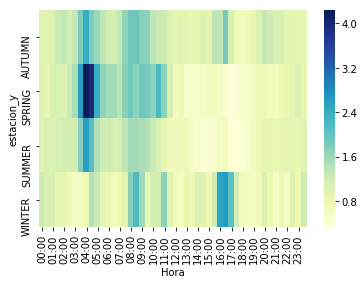

In [87]:
ax = sns.heatmap(data.pivot_table(index="estacion_y", columns="Hora", aggfunc=np.mean)["RainIMR"], cmap="YlGnBu")

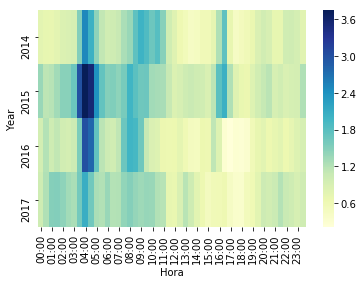

In [88]:
ax = sns.heatmap(data.pivot_table(index="Year", columns="Hora",aggfunc=np.mean)["RainIMR"],cmap="YlGnBu")

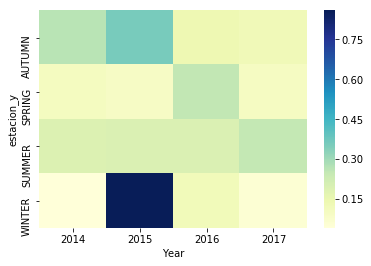

In [89]:
ax = sns.heatmap(dataCorr.pivot_table(index="estacion_y", columns="Year",aggfunc=np.sum)["RainWRF"],cmap="YlGnBu")

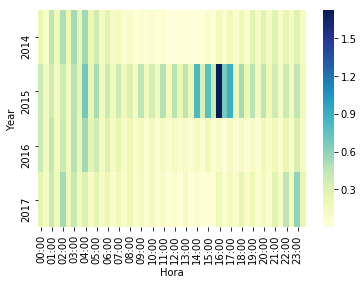

In [91]:
ax = sns.heatmap(data.pivot_table(index="Year", columns="Hora",aggfunc=np.mean)["RainWRF"],cmap="YlGnBu")

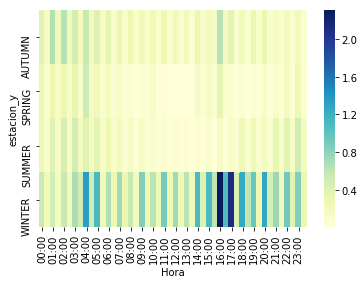

In [92]:
ax = sns.heatmap(data.pivot_table(index="estacion_y", columns="Hora", aggfunc=np.mean)["RainWRF"], cmap="YlGnBu")

In [93]:
data.head()

,Canon,Estado,Nombre,Year,Month,Day,Hora,RainIMR,RainWRF,estacion_y,Reflectividad,diff
506,1,MICH,La Alberca,2014,3,22,13:00,0.099763,0.0,SPRING,0.0,0.099763
507,1,MICH,La Alberca,2014,3,22,13:30,0.099763,0.0,SPRING,0.0,0.099763
613,1,MICH,La Alberca,2014,3,24,18:30,0.033557,0.0,SPRING,0.0,0.033557
614,1,MICH,La Alberca,2014,3,24,19:00,0.033557,0.0,SPRING,0.0,0.033557
830,1,MICH,La Alberca,2014,3,29,07:00,0.033557,0.0,SPRING,0.0,0.033557


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185850 entries, 506 to 2308425
Data columns (total 12 columns):
Canon            185850 non-null int64
Estado           185850 non-null object
Nombre           185850 non-null object
Year             185850 non-null int64
Month            185850 non-null int64
Day              185850 non-null int64
Hora             185850 non-null object
RainIMR          185850 non-null float64
RainWRF          185850 non-null float64
estacion_y       185850 non-null object
Reflectividad    185850 non-null float64
diff             185850 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 23.4+ MB


In [95]:
# leer csv
data = pd.read_csv("data/data_nasa_wrf_merge_3.csv")

In [97]:
data.columns

Index(['Unnamed: 0', 'Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year',
       'Month', 'Day', 'Hour_x', 'RainIMR', 'areaInfluencia2', 'estacion_x',
       'Hora', 'Hour_y', 'RainWRF', 'Fecha', '0pre', '10-15pre', '5-10pre',
       '15-20pre', '25-30pre', '20-25pre', '1-5pre', '>30pre', '0',
       'estacion_y'],
      dtype='object')

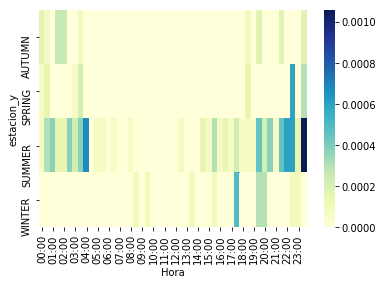

In [98]:
ax = sns.heatmap(data.pivot_table(index="estacion_y", columns="Hora", aggfunc=np.mean)["15-20pre"], cmap="YlGnBu")

In [101]:
# leer csv
data = pd.read_csv("data/Resultado_7.csv")

In [102]:
data.columns

Index(['Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year', 'Month', 'Day',
       'Hour', 'RainIMR', 'RainIMR_posterior_1', 'RainIMR_posterior_2',
       'diff_previa', 'diff_posterior', 'Rango_previo', 'Rango_posterior',
       'validacionEvento', 'Fecha', 'Hora', '0pre', '1-5pre', '20-25pre',
       '5-10pre', '10-15pre', '15-20pre', '25-30pre', '0', '>30pre'],
      dtype='object')

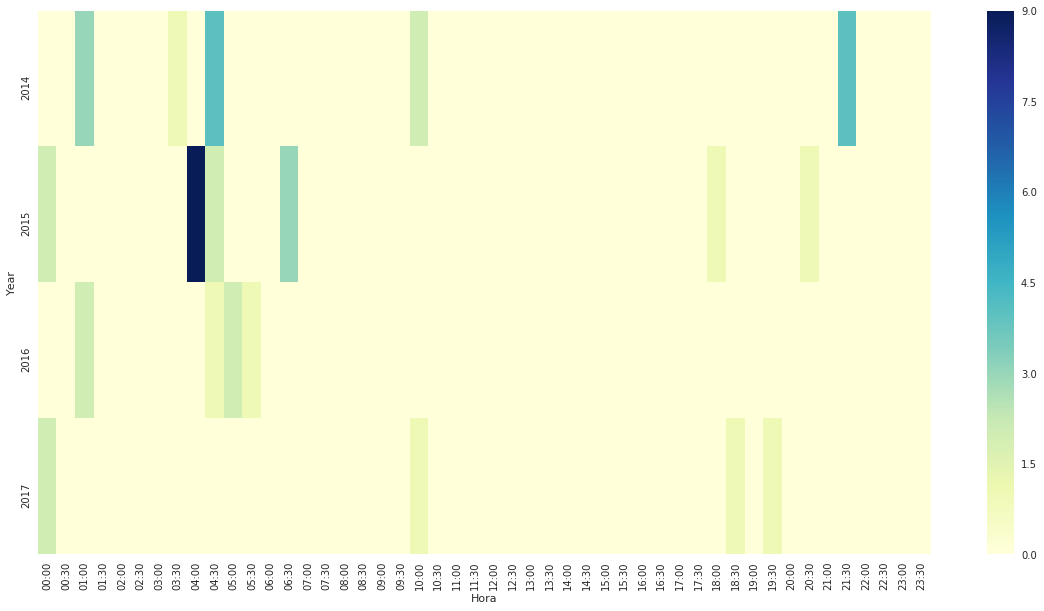

In [108]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.heatmap(data.pivot_table(index="Year", columns="Hora", aggfunc=np.sum)["validacionEvento"], cmap="YlGnBu")

In [109]:
def generarEstacion(m,d):
    if m == 1 or m == 2:
        return "WINTER"
    if m == 3:
        if d < 21:
            return "WINTER"
        else:
            return "SPRING"
    if m == 4 or m == 5:
        return "SPRING"
    if m == 6:
        if d < 22:
            return "SPRING"
        else:
            return "SUMMER"
    if m == 7 or m == 8:
        return "SUMMER"
    if m == 9:
        if d < 22:
            return "SUMMER"
        else:
            return "AUTUMN"
    if m == 10 or m == 11:
        return "AUTUMN"
    if m == 12:
        if d < 21:
            return "AUTUMN"
        else:
            return "WINTER"

In [110]:
data["estacion"] = data.apply(lambda x: generarEstacion(x["Month"], x["Day"]), axis=1)

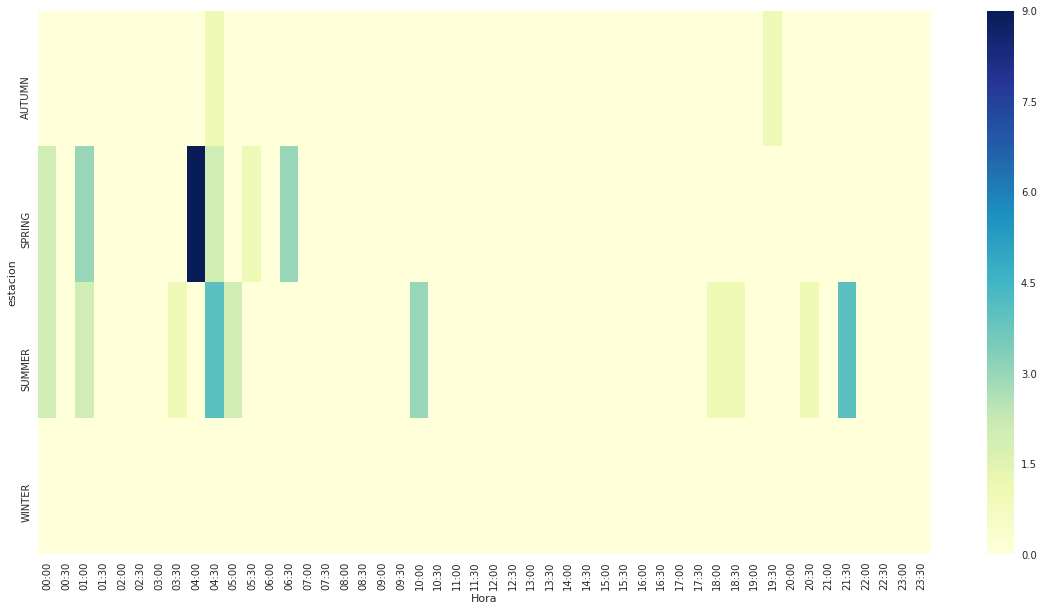

In [111]:
ax = sns.heatmap(data.pivot_table(index="estacion", columns="Hora", aggfunc=np.sum)["validacionEvento"], cmap="YlGnBu")

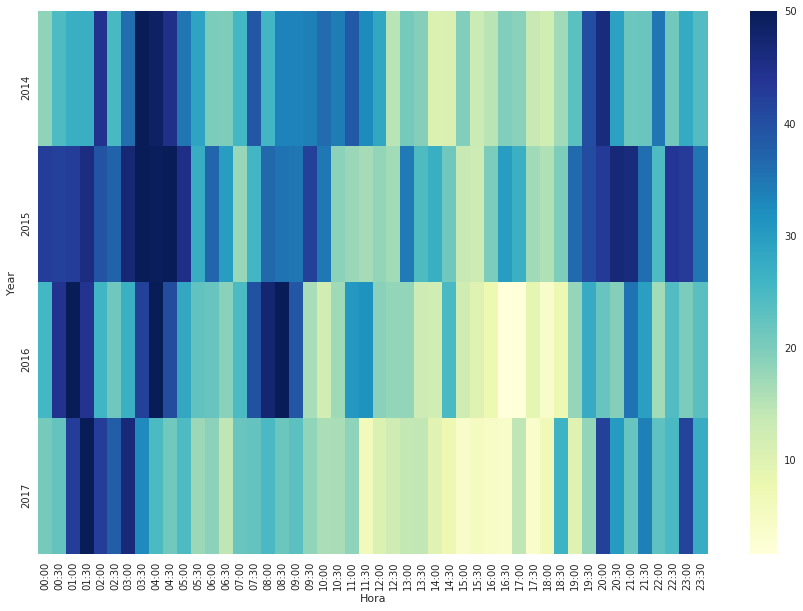

In [127]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.heatmap(data.pivot_table(index="Year", columns="Hora", aggfunc=np.max)["RainIMR"], cmap="YlGnBu")

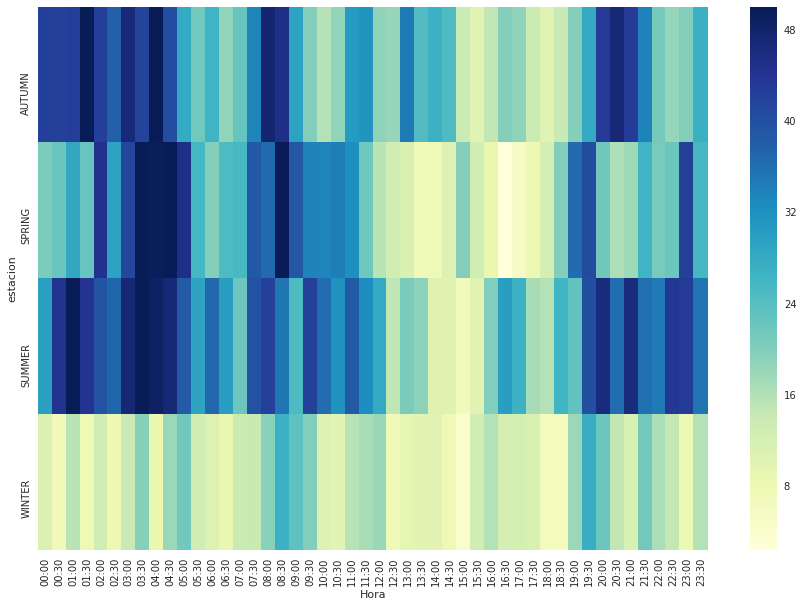

In [128]:
ax = sns.heatmap(data.pivot_table(index="estacion", columns="Hora", aggfunc=np.max)["RainIMR"], cmap="YlGnBu")

In [115]:
dataWRF = pd.read_csv("data/Resultado_wrf_1.csv")

In [117]:
dataWRF["estacion"] = dataWRF.apply(lambda x: generarEstacion(x["Month"], x["Day"]), axis=1)

In [118]:
dataWRF.columns

Index(['Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year', 'Month', 'Day',
       'Hour', 'RainWRF', 'RainWRF_posterior_1', 'RainWRF_posterior_2',
       'diff_previa', 'diff_posterior', 'Rango_previo', 'Rango_posterior',
       'validacionEvento', 'Fecha', 'Hora_Formato', '0pre', '1-5pre',
       '5-10pre', '>30pre', '20-25pre', '10-15pre', '0', '25-30pre',
       '15-20pre', 'estacion'],
      dtype='object')

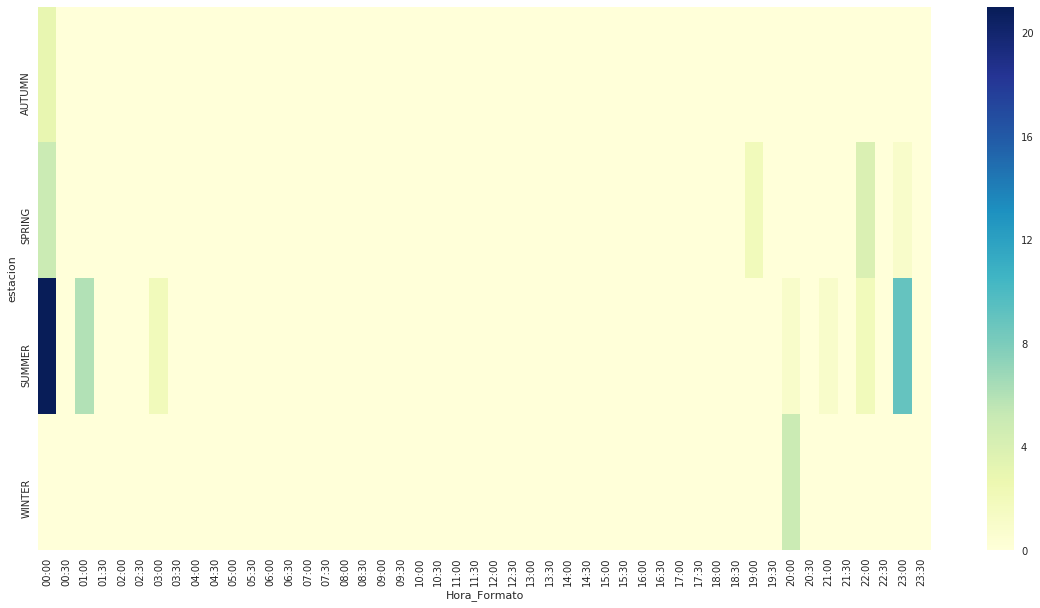

In [119]:
ax = sns.heatmap(dataWRF.pivot_table(index="estacion", columns="Hora_Formato", aggfunc=np.sum)["validacionEvento"], cmap="YlGnBu")

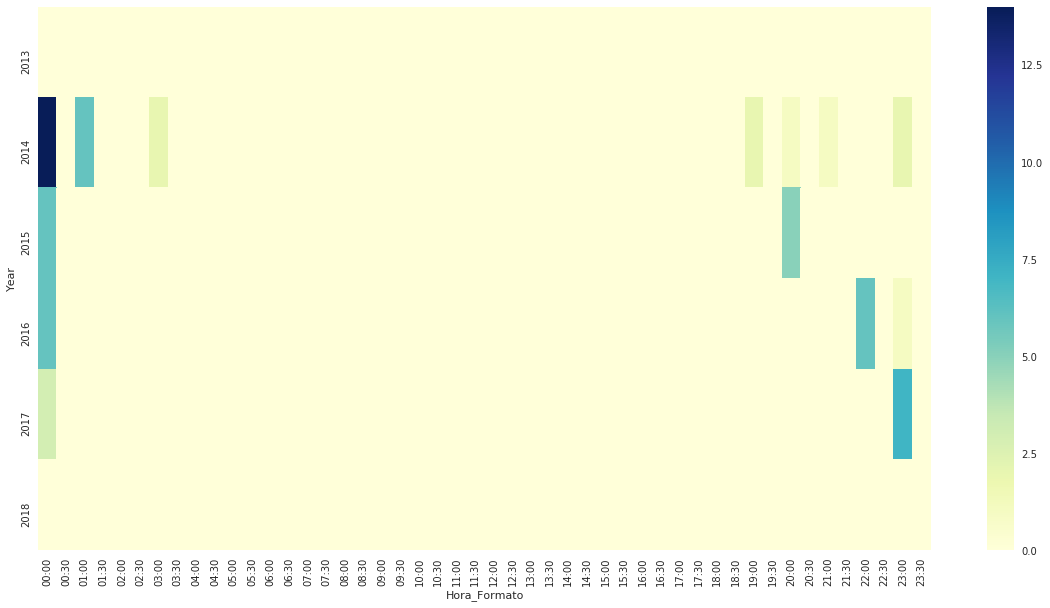

In [120]:
ax = sns.heatmap(dataWRF.pivot_table(index="Year", columns="Hora_Formato", aggfunc=np.sum)["validacionEvento"], cmap="YlGnBu")

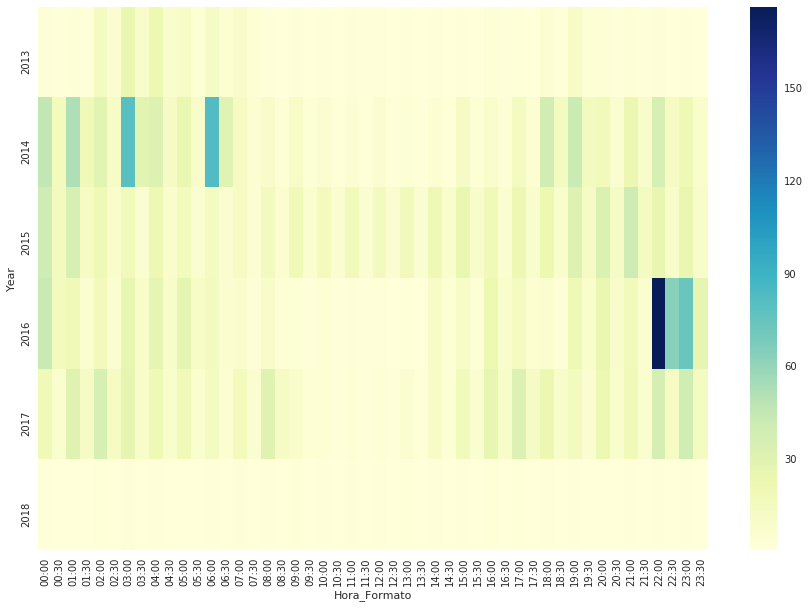

In [129]:
ax = sns.heatmap(dataWRF.pivot_table(index="Year", columns="Hora_Formato", aggfunc=np.max)["RainWRF"], cmap="YlGnBu")

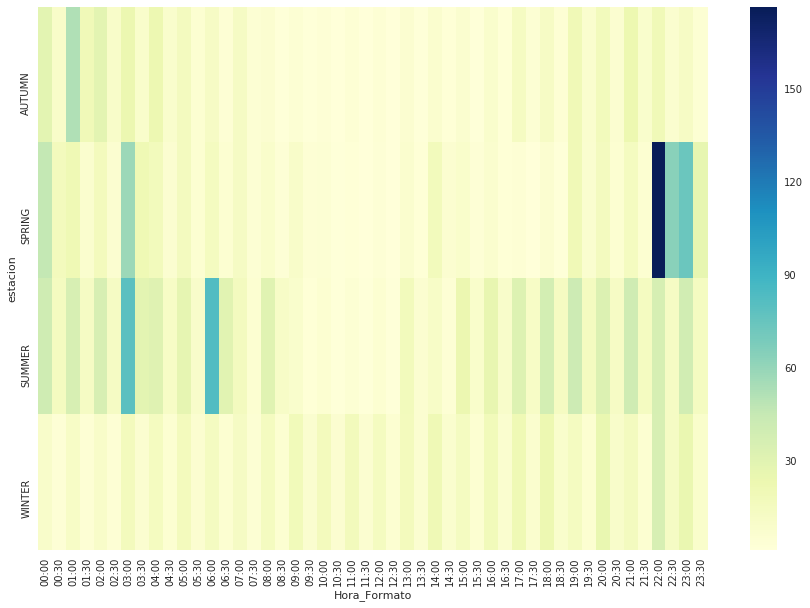

In [130]:
ax = sns.heatmap(dataWRF.pivot_table(index="estacion", columns="Hora_Formato", aggfunc=np.max)["RainWRF"], cmap="YlGnBu")

In [131]:
data.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainIMR,...,0pre,1-5pre,20-25pre,5-10pre,10-15pre,15-20pre,25-30pre,0,>30pre,estacion
0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,0,0.0,...,1,0,0,0,0,0,0,0,0,WINTER
1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,30,0.0,...,1,0,0,0,0,0,0,0,0,WINTER
2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,60,0.0,...,1,0,0,0,0,0,0,0,0,WINTER
3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,90,0.0,...,1,0,0,0,0,0,0,0,0,WINTER
4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,120,0.0,...,1,0,0,0,0,0,0,0,0,WINTER


In [132]:
def generarAnioEstacion(a,e):
    return "{}-{}".format(a,e)

In [133]:
data["Año-Estación"] = data.apply(lambda x: generarAnioEstacion(x["Year"], x["estacion"]), axis=1)

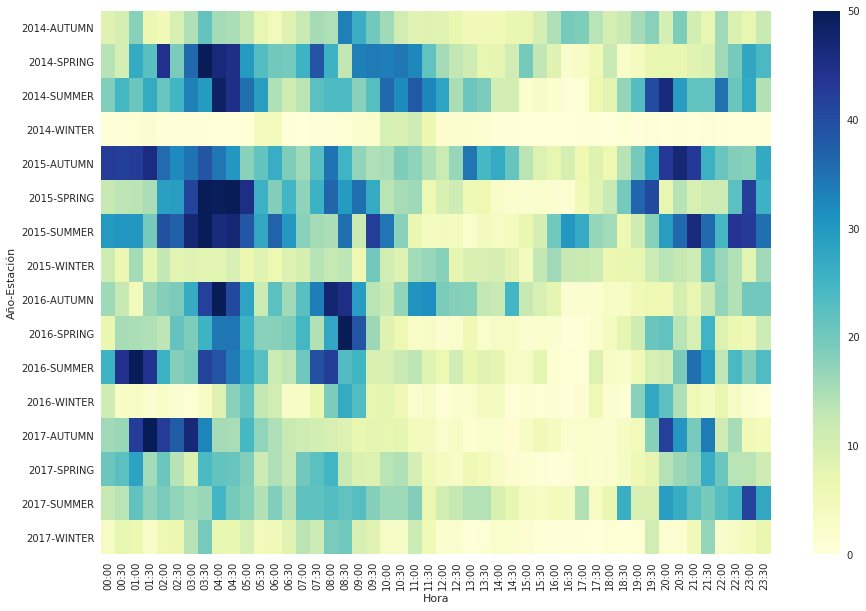

In [134]:
ax = sns.heatmap(data.pivot_table(index="Año-Estación", columns="Hora", aggfunc=np.max)["RainIMR"], cmap="YlGnBu")

In [141]:
dataWRF = dataWRF.loc[(dataWRF["Year"]>=2014) & (dataWRF["Year"]<=2017)]

In [142]:
dataWRF["Año-Estación"] = dataWRF.apply(lambda x: generarAnioEstacion(x["Year"], x["estacion"]), axis=1)

/home/jorge/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
dataWRF["Año-Estación"] = dataWRF.apply(lambda x: generarAnioEstacion(x["Year"], x["estacion"]), axis=1)

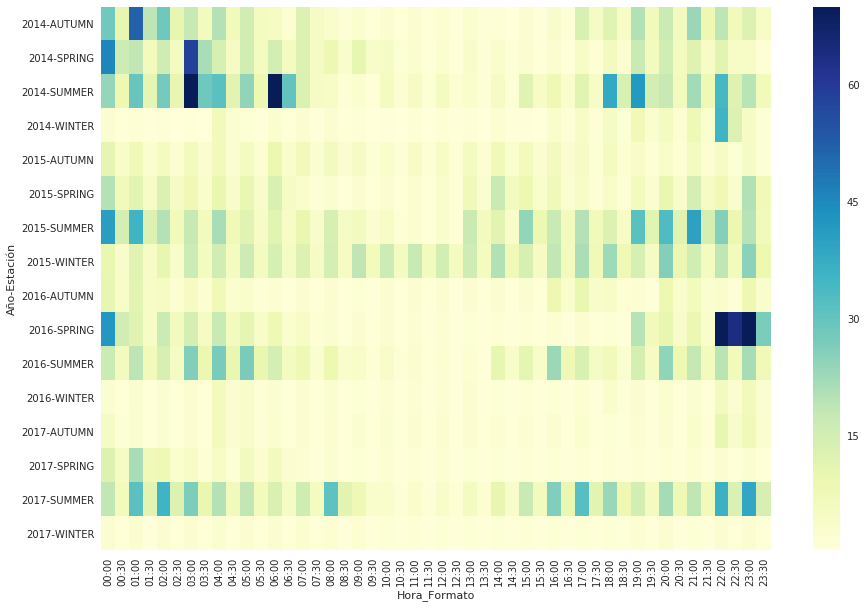

In [143]:
ax = sns.heatmap(dataWRF.pivot_table(index="Año-Estación", columns="Hora_Formato", aggfunc=np.max)["RainWRF"], cmap="YlGnBu", vmax=70)